<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


# Beschreibung von Kornverteilungskurven

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact
from ipywidgets import interactive
import scipy as sp
from scipy import interpolate
import scipy.stats as stats
import pandas as pd

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/kornverteilungskurve_plots.ipynb

Im Zuge der Bestimmung einer Sieblinie werden Siebrückstände $m_i$ ermittelt. Die einzelnen zu den Siebdurchmessern $d_i$ gehörigen Siebrückstände $m_i$ können nun auf die Gesamtmasse $m_\text{d} = \sum m_i$ (Annahme vernachlässigbarer Siebverluste) bezogen werden, womit die Masseanteile

$$
    x_i = \frac{m_i}{m_\text{d}}
$$

ermittelt werden. Diese können in Form eines Histogramms dargestellt werden. Komplementär zu den Siebrückständen sind die Siebdurchgänge. Diese sind ein Maß für den Anteil des Bodens, dessen Korndurchmesser unterhalb der Siebmaschenweite liegen.

$$
    F(d_i) = \sum \limits_{k=1}^i x_i
$$

Aus dieser Betrachtung resultiert die typische Summenkurve. Dabei wird aufgrund der über Größenordnungen verteilten Korndurchmesser eine halblogarithmische Darstellung gewählt (siehe folgende Abbildung, rechts). Feinanteile, die nicht durch Siebung näher untersucht werden, sind nicht mit dargestellt. In der linken Abbildung sind die Masseanteile selbst und das zugehörige Histogramm der Masseverteilung dargestellt.

Mithilfe der Körnungslinie bzw. Kornverteilungskurve können die dominierenden Bestandteile (T, U, S, G) ermittelt werden. Des weiteren können die Ungleichförmigkeitszahl

$$
    C_\text{U} = \frac{d_{60}}{d_{10}}
$$

und die Krümmungszahl

$$
    C_\text{C} = \frac{d_{30}^2}{d_{10}\ d_{60}}
$$

abgeleitet werden. 

Die folgenden Siebrückstände seien gegeben:

In [46]:
Siebdurchmesser = np.array([63,31.5,16,8,4,2,1,0.5,0.25,0.125,0.063,0.001])#letzter: Rückstand in Null
Startwerte = np.array([0,0,842.4,1059.8,1222.9,788.0,706.6,407.6,210.0,195.7,0,0])

Massen = [widgets.FloatText(value=Startwerte[i],description=str(Siebdurchmesser[i])+' mm') for i in range(len(Siebdurchmesser))]
Eingabe=widgets.VBox(Massen)
display(Eingabe)

In [44]:
interact(print_table_glob, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

In [45]:
interact(plot_KVK_glob, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

Damit lassen sich die Masseanteile der einzelnen Kornfraktionen ablesen (in Prozent):

In [33]:
interact(Anteilsbestimmung_glob, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

In [34]:
interact(plot_Rohdaten_glob, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

### Ergänzende Überlegungen (nicht interaktiv)

Betrachten wir nun eine Mischung zweier gleichförmiger Böden mit unterschiedlichen mittleren Korndurchmessern.

In [35]:
m_1 = np.array([0,0,0,0,0,0,0,0,20,60,20,0])
dm_1 = Masseanteile(m_1)
sum_dm_1 = Siebdurchgang(dm_1)

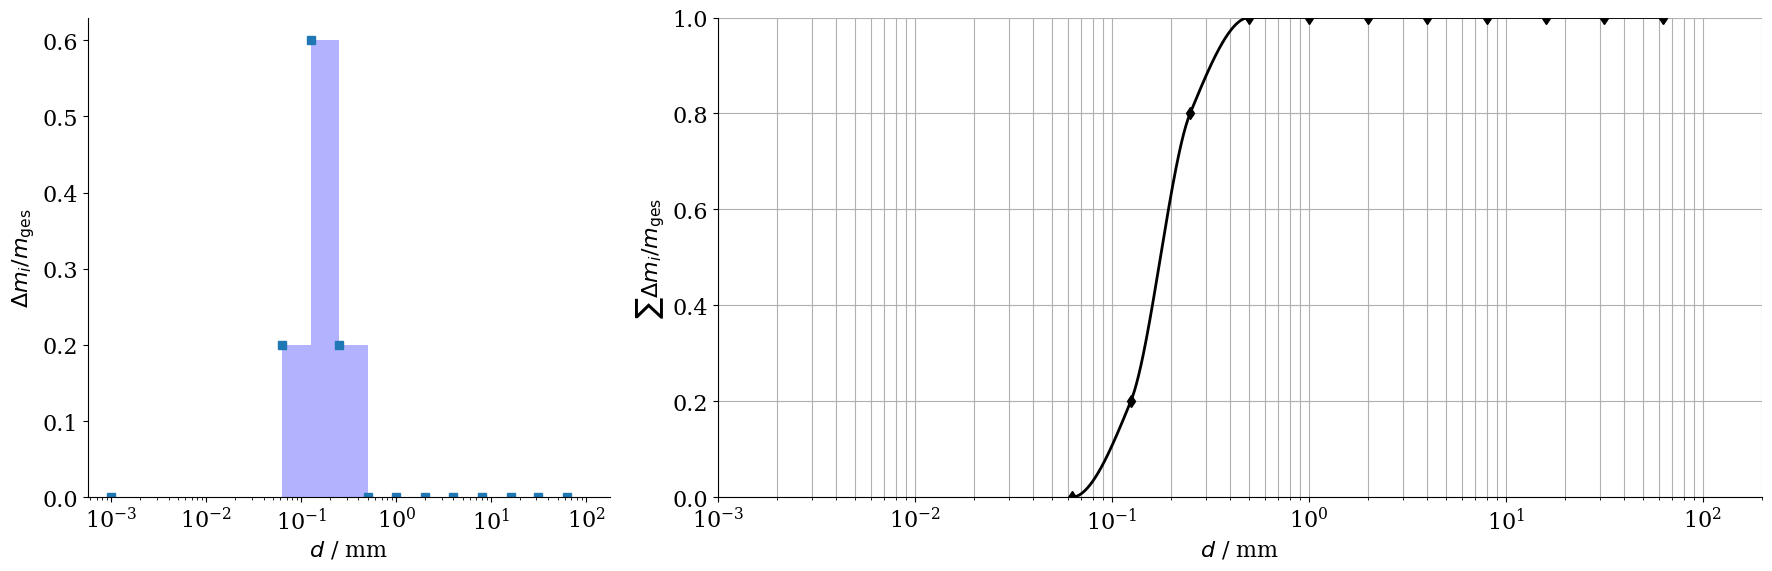

In [36]:
plot_Rohdaten(dm_1,sum_dm_1)

In [37]:
m_2 = np.array([0,0,0,60,180,60,1,1,0,0,0,0])
dm_2 = Masseanteile(m_2)
sum_dm_2 = Siebdurchgang(dm_2)

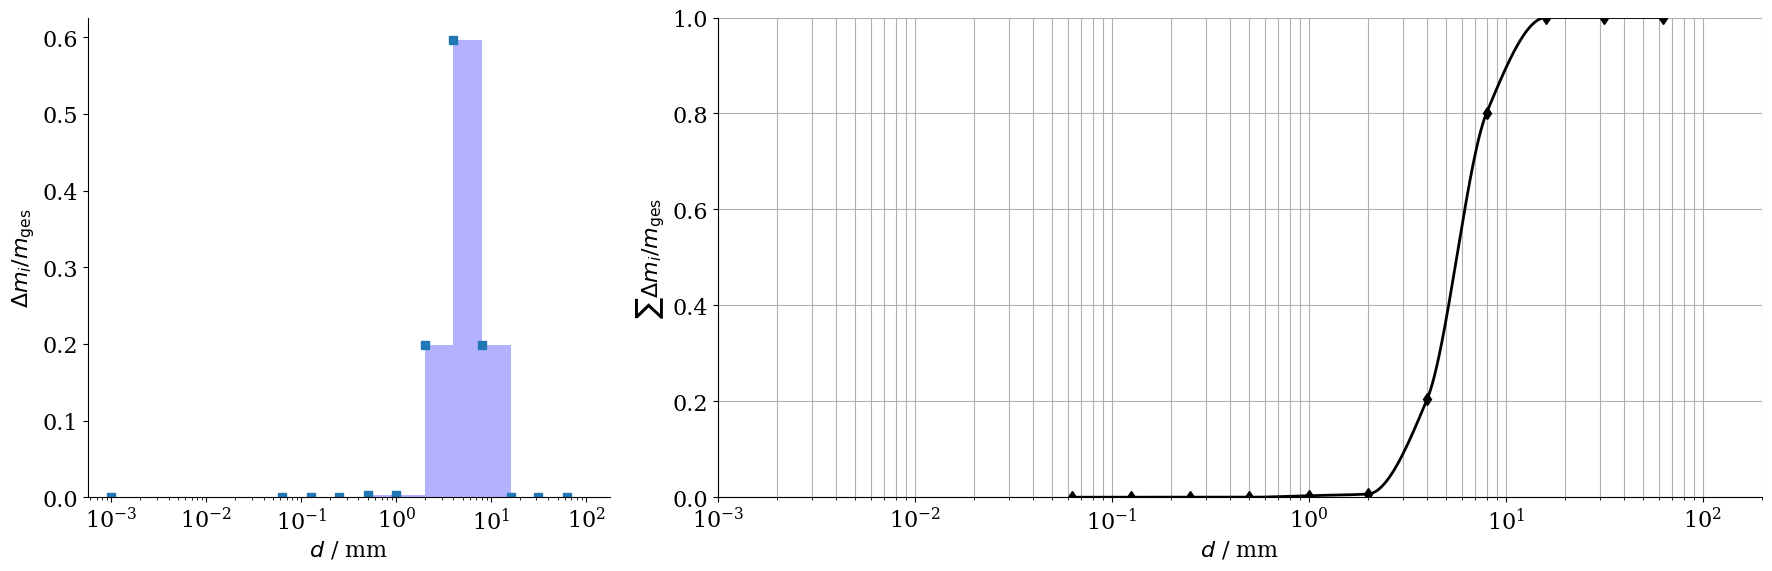

In [38]:
plot_Rohdaten(dm_2,sum_dm_2)

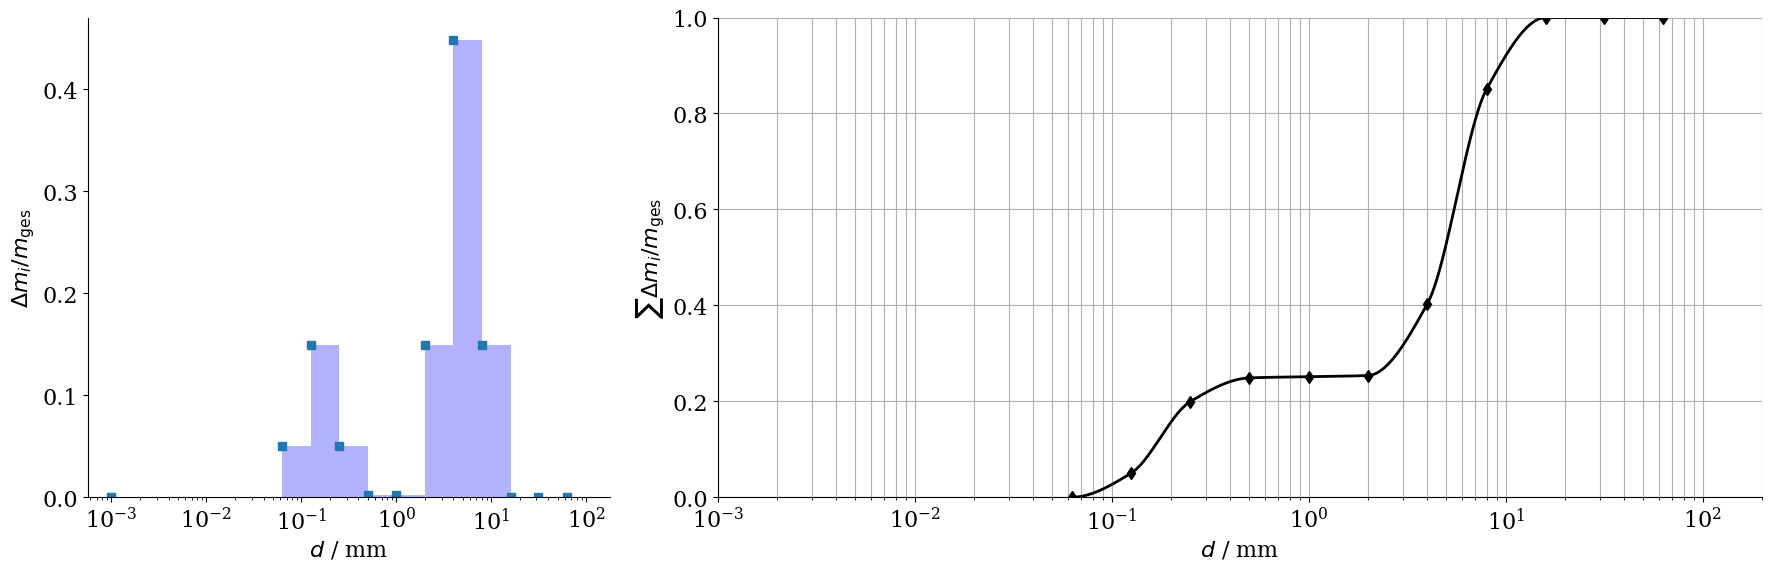

In [39]:
m_12 = m_1 + m_2
dm_12 = Masseanteile(m_12)
sum_dm_12 = Siebdurchgang(dm_12)
plot_Rohdaten(dm_12,sum_dm_12)

Es ergibt sich eine erwartungsgemäß eine bimodale Verteilung.

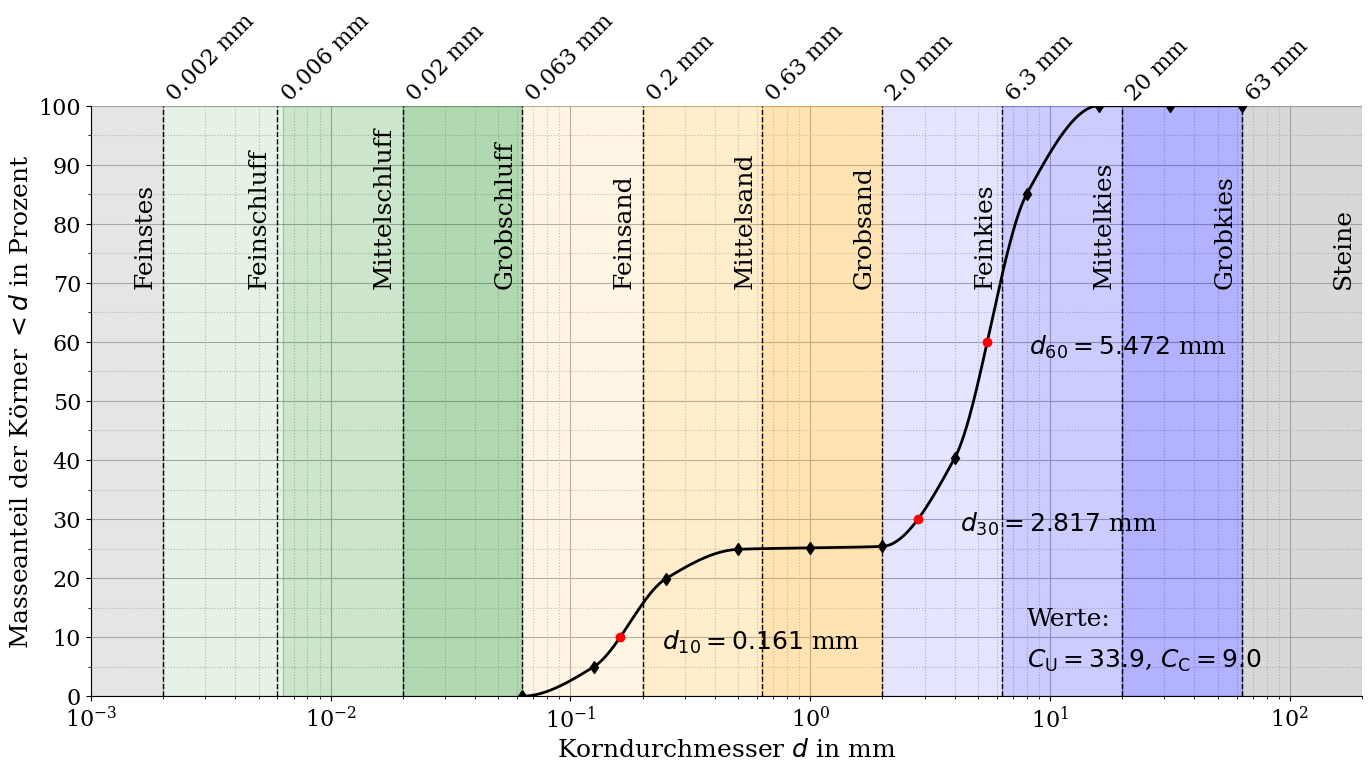

In [40]:
plot_KVK(sum_dm_12)

## Anmerkung zu Wahrscheinlichkeitsverteilungen

Wir kennen diese Konzepte bereits aus einem anderen Zusammenhang: Wahrscheinlichkeitsdichten und (kumulativen) Verteilungsfunktionen. Das bekannteste Beispiel ist die Normalverteilung, die in der bekannten Gauß'schen Glockenkurve resultiert:

$$
    f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( - \frac{(x-\mu)^2}{2\sigma^2} \right)
$$

Deren Integration ergibt die (kumulative) Verteilungfunktion

$$
    F(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \int \limits_{-\infty}^{x} \exp \left( - \frac{(t-\mu)^2}{2\sigma^2} \right)\,\text{d}t\, ,
$$

aus der sich die Wahrscheinlichkeit ableitet, dass ein Wert $\leq x$ vorliegt.

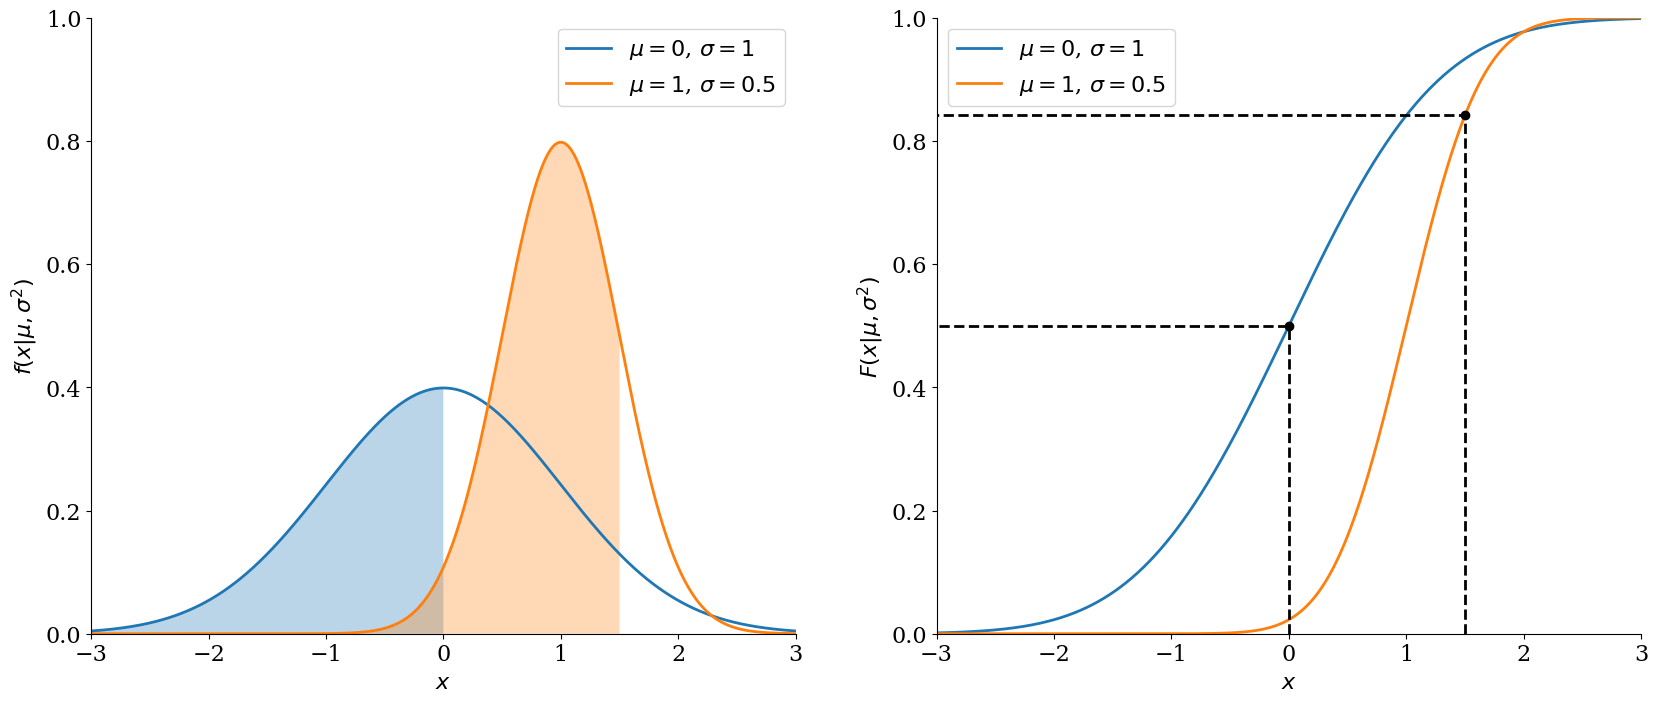

In [41]:
x = np.linspace(-3,3,1000)
fig, ax = plt.subplots(ncols=2,figsize=(20,8))
ax[0].plot(x,stats.norm.pdf(x,0,1),label=r'$\mu = 0$, $\sigma = 1$')
ax[0].fill_between(np.linspace(-3,0,1000),stats.norm.pdf(np.linspace(-3,0,1000),0,1),alpha=0.3)
ax[0].plot(x,stats.norm.pdf(x,1,0.5),label=r'$\mu = 1$, $\sigma = 0.5$')
ax[0].fill_between(np.linspace(-3,1.5,1000),stats.norm.pdf(np.linspace(-3,1.5,1000),1,0.5),alpha=0.3)
ax[0].set_ylabel(r'$f(x|\mu,\sigma^2)$')
#
ax[1].plot(x,stats.norm.cdf(x,0,1),label=r'$\mu = 0$, $\sigma = 1$')
ax[1].plot(x,stats.norm.cdf(x,1,0.5),label=r'$\mu = 1$, $\sigma = 0.5$')
ax[1].plot(0,stats.norm.cdf(0,0,1),marker='o',ls='-',color='black')
ax[1].plot([0,0,-3],[0,0.5,0.5],color='black',ls='--')
ax[1].plot(1.5,stats.norm.cdf(1.5,1,0.5),marker='o',ls='-',color='black')
ax[1].plot([1.5,1.5,-3],[0,stats.norm.cdf(1.5,1,0.5),stats.norm.cdf(1.5,1,0.5)],color='black',ls='--')
ax[1].set_ylabel(r'$F(x|\mu,\sigma^2)$')
for i in range(2):
    ax[i].set_xlabel(r'$x$')
    ax[i].set_xlim(-3,3)
    ax[i].set_ylim(0,1)
    ax[i].legend(); 

## Anmerkung zur Achsenteilung der KVK

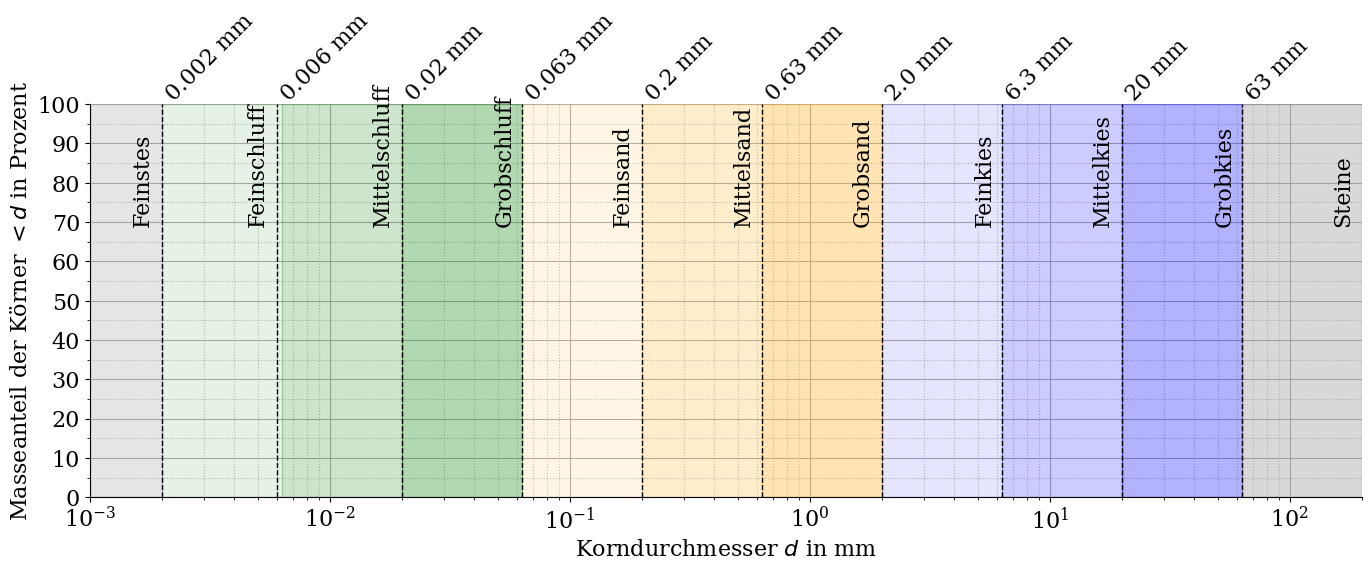

In [42]:
plot_basics()

Seien die Grenzen Schluff-/Tonkorn Kies/Sand mit 2 µm bzw. 2 mm gegeben. Möchte man nun im logarithmischen Maßstab in der Mitte zwischen 2 und 0.002 einen Wert $x$ setzen, so gilt:

$$
    \log \frac{2}{0.002} = 2 \log \frac{x}{0.002}
$$

und mit den bekannten Rechenregeln:

\begin{align}
    \frac{2}{0.002} &= \left( \frac{x}{0.002} \right)^2
    \ \
    x &= 0.002 \sqrt{1000}
    \
    &\approx 0.063
\end{align}

Die Grenze liegt also bei 0.063 mm. Dieses Muster setzt sich bei der Einteilung in die weiteren Untergruppen fort.